# Deep Learning with Pytorch: A 60 Minute Blitz

In [1]:
import torch

In [2]:
x = torch.Tensor(5,3)
print(x)


 0.0000e+00  0.0000e+00 -3.7017e+09
 4.5713e-41 -5.7247e+07  4.5713e-41
-1.6232e+15  4.5713e-41 -1.6232e+15
 4.5713e-41 -3.7020e+09  4.5713e-41
-3.7019e+09  4.5713e-41 -3.7016e+09
[torch.FloatTensor of size 5x3]



In [3]:
x = torch.rand(5,3)
print(x, x.size(), x.size()[1])


 0.3732  0.5216  0.7017
 0.9557  0.7070  0.3795
 0.3037  0.0428  0.3259
 0.5112  0.4551  0.0332
 0.9299  0.1557  0.8673
[torch.FloatTensor of size 5x3]
 torch.Size([5, 3]) 3


In [4]:
y = torch.rand(5,3)
print(x + y)


 1.2181  1.3021  0.9740
 1.3199  0.8762  0.6834
 1.2652  0.1654  1.2459
 1.0097  0.6807  0.1729
 1.7904  0.7400  1.3473
[torch.FloatTensor of size 5x3]



In [5]:
y.add_(x)


 1.2181  1.3021  0.9740
 1.3199  0.8762  0.6834
 1.2652  0.1654  1.2459
 1.0097  0.6807  0.1729
 1.7904  0.7400  1.3473
[torch.FloatTensor of size 5x3]

In [6]:
a = y.add(x)
print(a, y)


 1.5912  1.8237  1.6757
 2.2756  1.5831  1.0628
 1.5688  0.2082  1.5717
 1.5209  1.1358  0.2061
 2.7203  0.8956  2.2146
[torch.FloatTensor of size 5x3]
 
 1.2181  1.3021  0.9740
 1.3199  0.8762  0.6834
 1.2652  0.1654  1.2459
 1.0097  0.6807  0.1729
 1.7904  0.7400  1.3473
[torch.FloatTensor of size 5x3]



In [7]:
print(x, x[:, 1])


 0.3732  0.5216  0.7017
 0.9557  0.7070  0.3795
 0.3037  0.0428  0.3259
 0.5112  0.4551  0.0332
 0.9299  0.1557  0.8673
[torch.FloatTensor of size 5x3]
 
 0.5216
 0.7070
 0.0428
 0.4551
 0.1557
[torch.FloatTensor of size 5]



In [8]:
a = torch.ones(5)
print(a)


 1
 1
 1
 1
 1
[torch.FloatTensor of size 5]



In [9]:
b = a.numpy()
print(b)

[ 1.  1.  1.  1.  1.]


In [10]:
a.add_(1)
print(a, b)


 2
 2
 2
 2
 2
[torch.FloatTensor of size 5]
 [ 2.  2.  2.  2.  2.]


In [11]:
import numpy as np
a = np.ones(5)
b = torch.from_numpy(a)
np.add(a, 1, out=a)
print(a)
print(b)

[ 2.  2.  2.  2.  2.]

 2
 2
 2
 2
 2
[torch.DoubleTensor of size 5]



In [20]:
if torch.cuda.is_available():
    %time x = x.cuda()
    y = y.cuda()
    x+y

CPU times: user 0 ns, sys: 0 ns, total: 0 ns
Wall time: 491 µs


# Autograd

In [22]:
import torch
from torch.autograd import Variable

In [52]:
x = Variable(torch.ones(2,2), requires_grad=True)
print(x)

Variable containing:
 1  1
 1  1
[torch.FloatTensor of size 2x2]



In [53]:
y = x + 2
print(y)
print(y.grad_fn)

Variable containing:
 3  3
 3  3
[torch.FloatTensor of size 2x2]



In [54]:
z = y * y * 3   # z = (x^2 + 4x + 4) * 3 = 3x^2 + 12x + 12
out = z.mean()  # out = sum(z) / 4
print(z, out)

Variable containing:
 27  27
 27  27
[torch.FloatTensor of size 2x2]
 Variable containing:
 27
[torch.FloatTensor of size 1]



In [55]:
# out.backward(torch.Tensor([0.1]))
out.backward()

In [56]:
#do/dx = do/dz * dz/dx = 1/4 * (6x + 12) = (6 + 12) / 4 = 4.5 (when x = 1)
print(x.grad)

Variable containing:
 4.5000  4.5000
 4.5000  4.5000
[torch.FloatTensor of size 2x2]



In [59]:
x = torch.randn(3)
x = Variable(x, requires_grad=True)
print(x)
y = x * 2
while y.data.norm() < 1000: 
    y = y * 2
print(y)

Variable containing:
 1.0105
 0.8058
 0.1281
[torch.FloatTensor of size 3]

Variable containing:
 1034.7050
  825.1531
  131.1623
[torch.FloatTensor of size 3]



In [62]:
gradients = torch.FloatTensor([0.1, 1.0, 0.0001])
y.backward(gradients)
print(x.grad)

Variable containing:
  102.4000
 1024.0000
    0.1024
[torch.FloatTensor of size 3]



# Neural Networks

In [87]:
import torch
from torch.autograd import Variable
import torch.nn as nn
import torch.nn.functional as F

class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        # 1 input image channel, 6 output channels, 5x5 square convolution
        # kernel
        self.conv1 = nn.Conv2d(1, 6, 5)
        self.conv2 = nn.Conv2d(6, 16, 5)
        # an affine operation: y = Wx + b
        self.fc1 = nn.Linear(16 * 5 * 5, 120)
        self.fc2 = nn.Linear(120, 84)
        self.fc3 = nn.Linear(84, 10)
        
    def forward(self, x): 
        # Max pooling over a (2, 2) window
        x = F.max_pool2d(F.relu(self.conv1(x)), (2, 2))
        # if the size is a square you can only specifiy a single number
        x = F.max_pool2d(F.relu(self.conv2(x)), 2)
        x = x.view(-1, self.num_flat_features(x))
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.fc3(x)
        return x
        
    def num_flat_features(self, x):
        size = x.size()[1:] # all dimensions except the batch dimension
        num_features = 1
        for s in size: 
            num_features *= s
        return num_features

net = Net()
print(net)

Net (
  (conv1): Conv2d(1, 6, kernel_size=(5, 5), stride=(1, 1))
  (conv2): Conv2d(6, 16, kernel_size=(5, 5), stride=(1, 1))
  (fc1): Linear (400 -> 120)
  (fc2): Linear (120 -> 84)
  (fc3): Linear (84 -> 10)
)


In [72]:
a = torch.randn((2,3))
print(a)
a.view(-1, 1)


 1.5319 -0.7691 -0.4855
 0.8437 -1.9202  0.1968
[torch.FloatTensor of size 2x3]




 1.5319
-0.7691
-0.4855
 0.8437
-1.9202
 0.1968
[torch.FloatTensor of size 6x1]

In [80]:
params = list(net.parameters())
print(len(params))
print(params[0].size())

10
torch.Size([6, 1, 5, 5])


In [98]:
input = Variable(torch.randn(1, 1, 32, 32))
out = net(input)
print(out)

Variable containing:
-0.0627 -0.1472  0.0350  0.0665 -0.0481 -0.1106 -0.0781 -0.1343  0.1879 -0.0157
[torch.FloatTensor of size 1x10]



In [99]:
net.zero_grad()
out.backward(torch.randn(1,10))

In [100]:
output = net(input)
target = Variable(torch.arange(1, 11))
criterion = nn.MSELoss()

loss = criterion(output, target)
print(loss)

Variable containing:
 38.7060
[torch.FloatTensor of size 1]



In [101]:
print(loss.grad_fn)  # MSELoss
print(loss.grad_fn.next_functions[0][0])  # Linear
print(loss.grad_fn.next_functions[0][0].next_functions[0][0])  # ReLU

In [102]:
net.zero_grad()
print('conv1.bias.grad before backward')
print(net.conv1.bias.grad)

loss.backward()

print('conv1.bias.grad before backward')
print(net.conv1.bias.grad)


conv1.bias.grad before backward
Variable containing:
 0
 0
 0
 0
 0
 0
[torch.FloatTensor of size 6]

conv1.bias.grad before backward
Variable containing:
 0.0501
-0.1240
-0.0307
 0.0152
 0.1543
-0.0588
[torch.FloatTensor of size 6]



In [103]:
# SGD

learning_rate = 0.01
for f in net.parameters(): 
    f.data.sub_(f.grad.data * learning_rate)


In [104]:
output = net(input)
target = Variable(torch.arange(1, 11))
criterion = nn.MSELoss()

loss = criterion(output, target)
print(loss)

Variable containing:
 38.1130
[torch.FloatTensor of size 1]



In [106]:
import torch.optim as optim

#create your optimizer
optimizer = optim.SGD(net.parameters(), lr=0.01)

# in your training loop
optimizer.zero_grad()
output = net(input)
loss = criterion(output, target)
loss.backward()
optimizer.step()

In [107]:
output = net(input)
loss = criterion(output, target)
print(loss)

Variable containing:
 37.4392
[torch.FloatTensor of size 1]



# Training a classifier

In [109]:
import torch
import torchvision
import torchvision.transforms as transforms


In [110]:
transform = transforms.Compose(
    [transforms.ToTensor(),
     transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))])

trainset = torchvision.datasets.CIFAR10(root='./data', train=True,
                                        download=True, transform=transform)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=4,
                                          shuffle=True, num_workers=2)

testset = torchvision.datasets.CIFAR10(root='./data', train=False,
                                       download=True, transform=transform)
testloader = torch.utils.data.DataLoader(testset, batch_size=4,
                                         shuffle=False, num_workers=2)

classes = ('plane', 'car', 'bird', 'cat',
           'deer', 'dog', 'frog', 'horse', 'ship', 'truck')

Files already downloaded and verified


horse   dog   car  ship


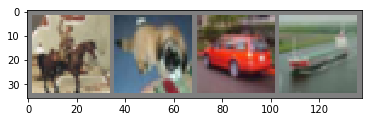

In [112]:
import matplotlib.pyplot as plt
import numpy as np

%matplotlib inline

# functions to show an image


def imshow(img):
    img = img / 2 + 0.5     # unnormalize
    npimg = img.numpy()
    plt.imshow(np.transpose(npimg, (1, 2, 0)))


# get some random training images
dataiter = iter(trainloader)
images, labels = dataiter.next()

# show images
imshow(torchvision.utils.make_grid(images))
# print labels
print(' '.join('%5s' % classes[labels[j]] for j in range(4)))

In [134]:
from torch.autograd import Variable
import torch.nn as nn
import torch.nn.functional as F


class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        self.conv1 = nn.Conv2d(3, 6, 5)
        self.pool = nn.MaxPool2d(2, 2)
        self.conv2 = nn.Conv2d(6, 16, 5)
        self.fc1 = nn.Linear(16 * 5 * 5, 120)
        self.fc2 = nn.Linear(120, 84)
        self.fc3 = nn.Linear(84, 10)

    def forward(self, x):
        x = self.pool(F.relu(self.conv1(x)))
        x = self.pool(F.relu(self.conv2(x)))
        x = x.view(-1, 16 * 5 * 5)
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.fc3(x)
        return x


net = Net()
net.cuda()

import torch.optim as optim
criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(net.parameters(), lr=0.001, momentum=0.9)


In [135]:
import time
t = time.time()


for epoch in range(2):
    running_loss = 0.0
    for i, data in enumerate(trainloader, 0):
        # get the inputs
        inputs, labels = data
        
        # wrap them in Variable
        inputs, labels = Variable(inputs.cuda()), Variable(labels.cuda())
#         inputs, labels = Variable(inputs), Variable(labels)
        
        # zero the parameter gradients
        optimizer.zero_grad()
        
        # forward + backward + optimize
        outputs = net(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()
        
        #print stats
        running_loss += loss.data[0]
        if i % 2000 == 1999: # print every 2000 mini batches
            print('[%d, %5d] loss: %.3f' % (epoch + 1, i + 1, running_loss/2000))
            running_loss = 0.0
            
print('Finished Training')
print('Took [%.4f]', time.time()-t)

[1,  2000] loss: 2.244
[1,  4000] loss: 1.987
[1,  6000] loss: 1.773
[1,  8000] loss: 1.630
[1, 10000] loss: 1.527
[1, 12000] loss: 1.475
[2,  2000] loss: 1.408
[2,  4000] loss: 1.394
[2,  6000] loss: 1.338
[2,  8000] loss: 1.321
[2, 10000] loss: 1.324
[2, 12000] loss: 1.306
Finished Training
Took [%.4f] 58.918261766433716


GroundTruth:    cat  ship  ship plane


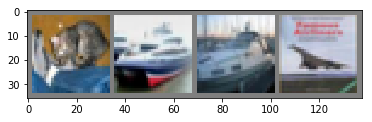

In [127]:
dataiter = iter(testloader)
images, labels = dataiter.next()

# print images
imshow(torchvision.utils.make_grid(images))
print('GroundTruth: ', ' '.join('%5s' % classes[labels[j]] for j in range(4)))

In [128]:
outputs = net(Variable(images))

_, predicted = torch.max(outputs.data, 1)

print('Predicted: ', ' '.join('%5s' % classes[predicted[j]]
                              for j in range(4)))

Predicted:    cat   car   car plane


In [129]:
correct = 0
total = 0
for data in testloader:
    images, labels = data
    outputs = net(Variable(images))
    _, predicted = torch.max(outputs.data, 1)
    total += labels.size(0)
    correct += (predicted == labels).sum()

print('Accuracy of the network on the 10000 test images: %d %%' % (
    100 * correct / total))

Accuracy of the network on the 10000 test images: 55 %


In [130]:
class_correct = list(0. for i in range(10))
class_total = list(0. for i in range(10))
for data in testloader:
    images, labels = data
    outputs = net(Variable(images))
    _, predicted = torch.max(outputs.data, 1)
    c = (predicted == labels).squeeze()
    for i in range(4):
        label = labels[i]
        class_correct[label] += c[i]
        class_total[label] += 1


for i in range(10):
    print('Accuracy of %5s : %2d %%' % (
        classes[i], 100 * class_correct[i] / class_total[i]))

Accuracy of plane : 63 %
Accuracy of   car : 73 %
Accuracy of  bird : 46 %
Accuracy of   cat : 34 %
Accuracy of  deer : 39 %
Accuracy of   dog : 53 %
Accuracy of  frog : 58 %
Accuracy of horse : 65 %
Accuracy of  ship : 67 %
Accuracy of truck : 48 %
